In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


# **TRAINING DATA PRE-PROCESSING**

In [ ]:
full_data =pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

# Data **Shape**

In [ ]:
full_data.shape

(4340, 8)

In [ ]:
full_data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### missing **values**

<Axes: >

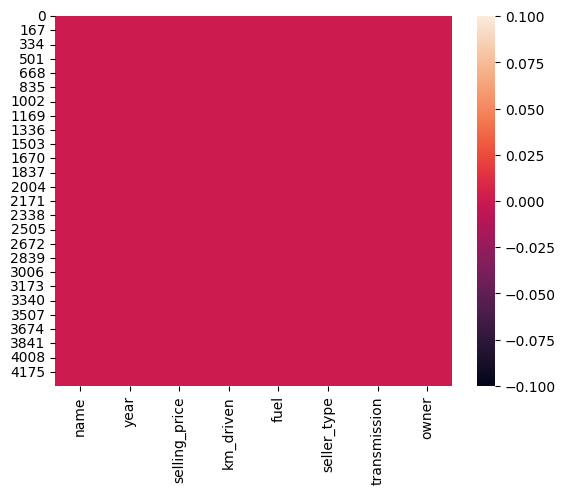

In [ ]:
sns.heatmap(full_data.isnull())

### **Distribution of Data**

<Axes: xlabel='selling_price', ylabel='km_driven'>

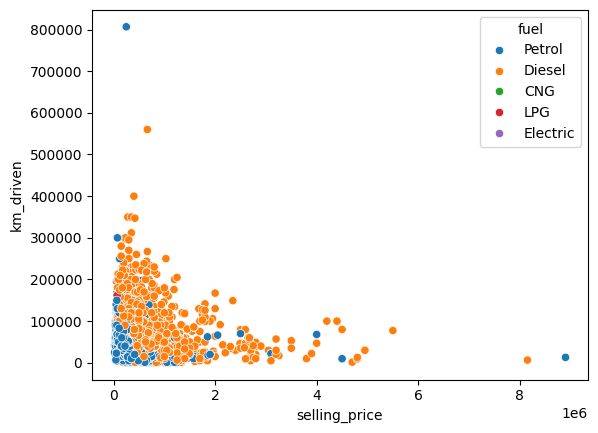

In [ ]:
sns.scatterplot(x='selling_price',y='km_driven',hue='fuel',data=full_data)

<Axes: xlabel='selling_price', ylabel='year'>

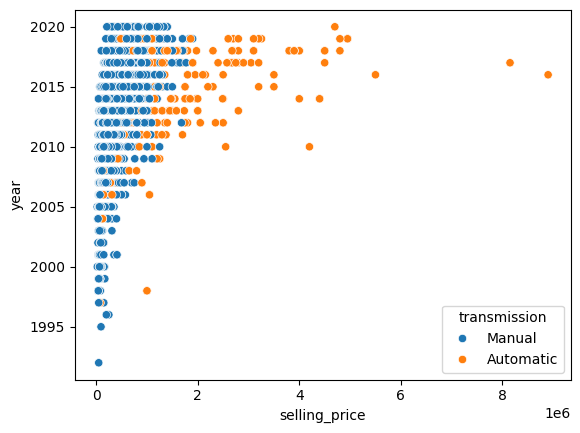

In [ ]:
sns.scatterplot(x='selling_price',y='year',hue='transmission',data=full_data)

<Axes: xlabel='selling_price', ylabel='seller_type'>

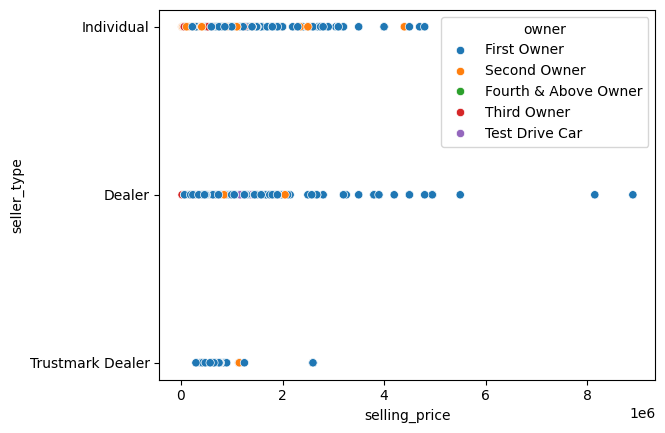

In [ ]:
sns.scatterplot(x='selling_price',y='seller_type',hue='owner',data=full_data)

<Axes: xlabel='transmission', ylabel='selling_price'>

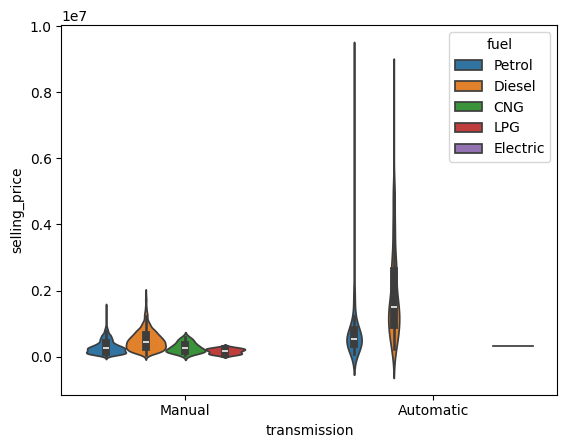

In [ ]:
sns.violinplot(x='transmission',y='selling_price',hue='fuel',data=full_data)

In [ ]:
full_data.shape

(4340, 8)

In [ ]:
full_data.drop('name',axis = 1,inplace=True)
full_data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner


### **GETTING MODEL READY**

# **Feature Engineering**

In [ ]:
full_data.select_dtypes(['category']).columns
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


## **Convert categorical variables into 'dummy' or indicator variables**

In [ ]:
fuel=pd.get_dummies(full_data['fuel'],drop_first=True)
seller_type=pd.get_dummies(full_data['seller_type'],drop_first=True)
transmission=pd.get_dummies(full_data['transmission'],drop_first=True)
owner=pd.get_dummies(full_data['owner'],drop_first=True)

In [ ]:
full_data.head(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
full_data=pd.concat([full_data,owner,transmission,seller_type,fuel],axis = 1)

In [ ]:
full_data.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,Manual,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,False,False,False,False,True,True,False,False,False,False,True
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,False,False,False,False,True,True,False,False,False,False,True
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,False,False,False,False,True,True,False,True,False,False,False
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,False,False,False,False,True,True,False,False,False,False,True
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,False,True,False,False,True,True,False,True,False,False,False
5,2007,140000,125000,Petrol,Individual,Manual,First Owner,False,False,False,False,True,True,False,False,False,False,True
6,2016,550000,25000,Petrol,Individual,Manual,First Owner,False,False,False,False,True,True,False,False,False,False,True
7,2014,240000,60000,Petrol,Individual,Manual,Second Owner,False,True,False,False,True,True,False,False,False,False,True
8,2015,850000,25000,Petrol,Individual,Manual,First Owner,False,False,False,False,True,True,False,False,False,False,True
9,2017,365000,78000,CNG,Individual,Manual,First Owner,False,False,False,False,True,True,False,False,False,False,False


In [ ]:
full_data.drop(['owner','transmission','seller_type','fuel'],axis = 1,inplace = True)

In [ ]:
full_data.head(10)
print(full_data.shape)

(4340, 14)


### **Target Variable Splitting**

In [ ]:
x=full_data.drop(['selling_price'],axis = 1)
y=full_data['selling_price']

In [ ]:
print(x.shape)
print(y.shape)

(4340, 13)
(4340,)


## **Data Transformation**

In [ ]:
from sklearn import preprocessing
pre_process=preprocessing.StandardScaler().fit(x)
x_transform=pre_process.fit_transform(x)

In [ ]:
x_transform

array([[-1.44507431,  0.08113906, -0.13790776, ..., -0.01518117,
        -0.0729916 ,  1.02189871],
       [-1.44507431, -0.3476891 , -0.13790776, ..., -0.01518117,
        -0.0729916 ,  1.02189871],
       [-0.2587948 ,  0.7243813 , -0.13790776, ..., -0.01518117,
        -0.0729916 , -0.97857057],
       ...,
       [-0.97056251,  0.35987736, -0.13790776, ..., -0.01518117,
        -0.0729916 ,  1.02189871],
       [ 0.69022881,  0.50996722, -0.13790776, ..., -0.01518117,
        -0.0729916 , -0.97857057],
       [ 0.69022881, -0.56210318, -0.13790776, ..., -0.01518117,
        -0.0729916 ,  1.02189871]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=101)

# **Random Forest**

## **Model Training**

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

Random Forest Regression :  72880834165.59143


## **Model Testing**

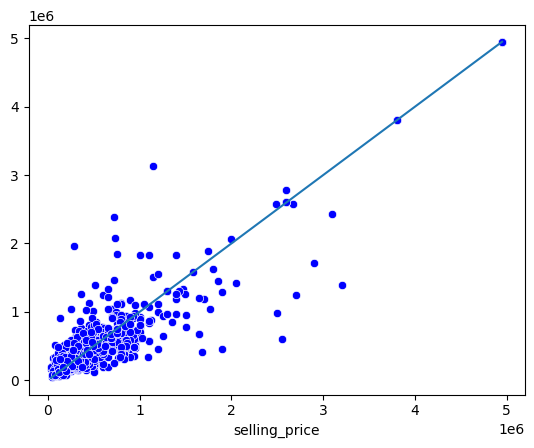

In [ ]:
sns.scatterplot(x=y_test,y=y_pred_rf,color='blue')
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)])

In [ ]:
results= np.column_stack((y_test,y_pred_rf))
print('actual values | Predicted values')
print('---------------------------------------')
for actual ,predicted in results:
  print(f"{actual:14.2f} |  {predicted:12.2f}")

actual values | Predicted values
---------------------------------------
      75000.00 |     101550.00
     800000.00 |     950345.21
     350000.00 |     606930.00
     249000.00 |     315207.78
    1090000.00 |     332370.53
     775000.00 |     851350.00
    3800000.00 |    3800000.00
     229999.00 |     229999.00
     195000.00 |     426604.17
     700000.00 |     945811.51
     350000.00 |     435623.80
     300000.00 |     245328.53
     700000.00 |     488911.90
     250000.00 |     233063.48
    1000000.00 |     783367.99
     170000.00 |     227229.74
     550000.00 |     250207.04
      61000.00 |      84310.00
     500000.00 |     286286.79
     450000.00 |     641971.00
    1100000.00 |    1076550.00
     200000.00 |     194472.06
     869999.00 |     723778.56
     750000.00 |     922054.13
     400000.00 |     669799.04
     925000.00 |     909898.07
     360000.00 |     408836.63
     200000.00 |     215408.39
     750000.00 |     750000.00
     585000.00 |     746873.

# **Gradient Boosting Regression**

## **Model Training**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_gb = gb_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_gb,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  79195991945.12656


## **Model Testing**

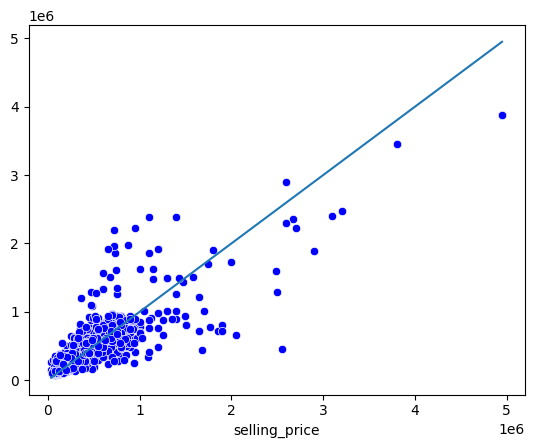

In [ ]:
sns.scatterplot(x=y_test,y=y_pred_gb,color='blue')
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)])

In [ ]:
results= np.column_stack((y_test,y_pred_gb))
print('actual values | Predicted values')
print('---------------------------------------')
for actual ,predicted in results:
  print(f"{actual:14.2f} |  {predicted:12.2f}")

actual values | Predicted values
---------------------------------------
      75000.00 |     107138.84
     800000.00 |     804423.95
     350000.00 |     464568.49
     249000.00 |     261304.16
    1090000.00 |     343972.20
     775000.00 |     576704.07
    3800000.00 |    3461741.90
     229999.00 |     266537.65
     195000.00 |     385000.03
     700000.00 |     882941.86
     350000.00 |     520949.56
     300000.00 |     347990.92
     700000.00 |     743658.35
     250000.00 |     249317.00
    1000000.00 |     800668.28
     170000.00 |     239621.42
     550000.00 |     419398.56
      61000.00 |     106022.44
     500000.00 |     327209.00
     450000.00 |     638791.76
    1100000.00 |    1866868.69
     200000.00 |     283564.93
     869999.00 |     616787.99
     750000.00 |     794945.48
     400000.00 |     678009.14
     925000.00 |     848984.76
     360000.00 |     563780.47
     200000.00 |     225044.21
     750000.00 |     668239.99
     585000.00 |     734930.